In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.4 MB/s eta 0:00:00


#Sentimental Analysis

###Vader

In [ ]:
# import SentimentIntensityAnalyzer class
# from vaderSentiment.vaderSentiment module.
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
 
# function to print sentiments
# of the sentence.
def sentiment_scores(sentence):
 
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
 
    # polarity_scores method of SentimentIntensityAnalyzer
    # object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(sentence)
     
    print("Overall sentiment dictionary is : ", sentiment_dict)
    print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative")
    print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral")
    print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive")
 
    print("Sentence Overall Rated As", end = " ")
 
    # decide sentiment as positive, negative and neutral
    if sentiment_dict['compound'] >= 0.05 :
        print("Positive")
 
    elif sentiment_dict['compound'] <= - 0.05 :
        print("Negative")
 
    else :
        print("Neutral")
 
 
   
# Driver code
if __name__ == "__main__" :
 
    print("\n1st statement :")
    sentence = "Geeks For Geeks is the best portal for \
                the computer science engineering students."
 
    # function calling
    sentiment_scores(sentence)
 
    print("\n2nd Statement :")
    sentence = "study is going on as usual"
    sentiment_scores(sentence)
 
    print("\n3rd Statement :")
    sentence = "sad."
    sentiment_scores(sentence)


1st statement :
Overall sentiment dictionary is :  {'neg': 0.165, 'neu': 0.588, 'pos': 0.247, 'compound': 0.5267}
sentence was rated as  16.5 % Negative
sentence was rated as  58.8 % Neutral
sentence was rated as  24.7 % Positive
Sentence Overall Rated As Positive

2nd Statement :
Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Neutral

3rd Statement :
Overall sentiment dictionary is :  {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.4767}
sentence was rated as  100.0 % Negative
sentence was rated as  0.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Negative


###Sentiment Analysis generic dataset

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 41.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 59.3 MB/s eta 0:00:00


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

tokenizer = AutoTokenizer.from_pretrained("Seethal/sentiment_analysis_generic_dataset")

model = AutoModelForSequenceClassification.from_pretrained("Seethal/sentiment_analysis_generic_dataset")

In [ ]:
text = "A model walks the runway for a fashion show during fashion week."

input = tokenizer(text, return_tensors = 'pt')
softmax(model(**input)[0][0].detach().numpy())

array([0.00107696, 0.9970625 , 0.00186051], dtype=float32)

In [ ]:
text = 'Strutting my stuff in the limelight'

input = tokenizer(text, return_tensors = 'pt')
softmax(model(**input)[0][0].detach().numpy())

#Length

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Information Retrieval Project/Instagram worthy captions dataset/final_data.csv')

In [ ]:
df

,Unnamed: 0,Original Caption,Creative Caption 1,Creative Caption 2,Creative Caption 3
0,0,Beauty and the beast is this prince that's all...,"""Falling for the fairytale 🌹🥀","""A tale as old as time 🕰️💕","""Happily ever after with my beast 👸🦁"
1,1,A rare photograph of an actor signing autographs.,"""Capturing a moment in time 📸🎬","""Inked memories for a lifetime 🖋️🎞️","""A glimpse into history 🎥🔮"
2,2,A model walks the runway for a fashion show du...,"""Walking on air in couture flair ✨👠","""Stealing the show in style 👑🌟","""Strutting my stuff in the limelight 💃🏻✨"
3,3,Rock artist is the first artist to win a posth...,"""Remembering a musical genius 🎵🤘","""Legends never die 🎸🌟","""Living on through the power of music 🎶🎤"
4,4,Fat mouse with a piece of cheese.,"""Living my best life with some cheese 🧀😋","""Food coma goals 🐭💤","""Say cheese 📸🐁"
...,...,...,...,...,...
2939,1238,"""Investing your cash, rather than splashing it...","""Smart money moves - investing cash instead of...","""Wealth-building strategy - investing wisely, ...","""Financial success - investing cash for big ga..."
2940,1239,"""The camera monitors the seagull flying in a c...","""Bird's eye view - camera capturing the seagul...","""Sky-high beauty - camera capturing the majest...","""In-flight action - camera monitoring the seag..."
2941,1240,"""Underwater view of synchronized swimmers form...","""Synchronized elegance - underwater view of sw...","""Swimming harmony - stunning underwater view o...","""Aquatic artistry - breathtaking underwater vi..."
2942,1241,"""Flag with flagpole waving in the wind against...","""Patriotic pride - flag waving proudly in the ...","""Symbol of freedom - flag and flagpole swaying...","""Waving glory - flag flying high on a flagpole..."


In [ ]:
orgCaptions = df.loc[:, "Original Caption"].reset_index(drop = True)
orgCaptions
orgCaptions.dropna(axis=0, inplace = True)

In [ ]:
maxLength = 0

for i in orgCaptions:
  curLength = len(i.split())
  if curLength > maxLength:
    maxLength = curLength

print(maxLength)

35


In [ ]:
lengthsDist = [0]*36
for i in orgCaptions:
  curLength = len(i.split())
  lengthsDist[curLength] = lengthsDist[curLength] + 1

print(lengthsDist)

[0, 7, 6, 7, 11, 378, 364, 334, 361, 288, 264, 200, 166, 121, 108, 79, 64, 31, 32, 22, 17, 15, 18, 8, 7, 5, 2, 2, 4, 2, 3, 3, 1, 5, 1, 1]


<BarContainer object of 36 artists>

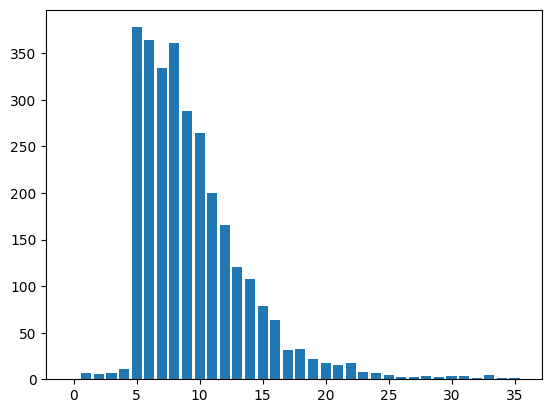

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

plt.bar(np.arange(len(lengthsDist)), lengthsDist)

In [ ]:
creativeCaptions = df.loc[:, "Creative Caption 1"].reset_index(drop = True)
creativeCaptions
creativeCaptions.dropna(axis=0, inplace = True)

In [ ]:
maxLength = 0

for i in creativeCaptions:
  curLength = len(i.split())
  if curLength > maxLength:
    maxLength = curLength

print(maxLength)

42


In [ ]:
lengthsDist = [0]*43
for i in creativeCaptions:
  curLength = len(i.split())
  lengthsDist[curLength] = lengthsDist[curLength] + 1

print(lengthsDist)

[0, 12, 9, 241, 272, 262, 309, 298, 243, 188, 196, 182, 145, 146, 112, 66, 64, 49, 28, 27, 13, 8, 12, 5, 3, 3, 7, 3, 3, 4, 4, 3, 1, 2, 2, 2, 3, 2, 0, 1, 0, 2, 1]


<BarContainer object of 43 artists>

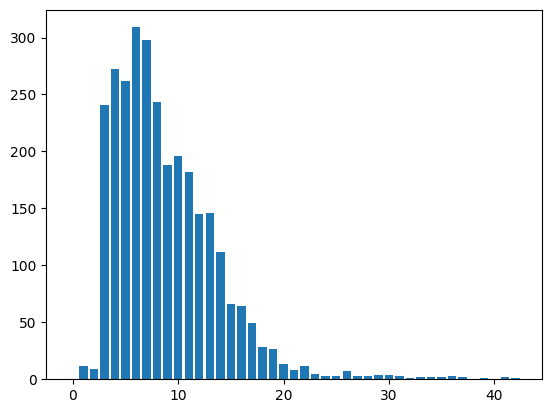

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

plt.bar(np.arange(len(lengthsDist)), lengthsDist)

#Parts of Speech

###All captions

In [ ]:
import nltk
!pip install nltk
nltk.download('all')
nltk.download('wordnet')
# from nltk.stem import WordNetLemmatizerd
nltk.download('stopwords')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
stop_words = set(stopwords.words('english'))

taggedOrg = []
for i in orgCaptions:
     
    # Word tokenizers is used to find the words
    # and punctuation in a string
    wordsList = nltk.word_tokenize(i)
 
    # removing stop words from wordList
    wordsList = [w for w in wordsList if not w in stop_words]
 
    #  Using a Tagger. Which is part-of-speech
    # tagger or POS-tagger.
    taggedOrg.append(nltk.pos_tag(wordsList))

In [ ]:
taggedOrg

[[('Beauty', 'NNP'),
  ('beast', 'VBD'),
  ('prince', 'NN'),
  ("'s", 'POS'),
  ('I', 'PRP'),
  ('know', 'VBP'),
  ('song', 'RB'),
  ('.', '.')],
 [('A', 'DT'),
  ('rare', 'JJ'),
  ('photograph', 'NN'),
  ('actor', 'NN'),
  ('signing', 'VBG'),
  ('autographs', 'NN'),
  ('.', '.')],
 [('A', 'DT'),
  ('model', 'NN'),
  ('walks', 'VBZ'),
  ('runway', 'JJ'),
  ('fashion', 'NN'),
  ('show', 'NN'),
  ('fashion', 'NN'),
  ('week', 'NN'),
  ('.', '.')],
 [('Rock', 'NNP'),
  ('artist', 'NN'),
  ('first', 'RB'),
  ('artist', 'JJ'),
  ('win', 'VBP'),
  ('posthumous', 'JJ'),
  ('award', 'NN'),
  ('.', '.')],
 [('Fat', 'NNP'),
  ('mouse', 'NN'),
  ('piece', 'NN'),
  ('cheese', 'NN'),
  ('.', '.')],
 [('Now', 'RB'),
  ('I', 'PRP'),
  ('could', 'MD'),
  ('incorporate', 'VB'),
  ('onto', 'IN'),
  ('foot', 'NN'),
  ('.', '.')],
 [('Pretty', 'RB'),
  ('young', 'JJ'),
  ('girl', 'NN'),
  ('watermelon', 'NN'),
  ('posing', 'VBG'),
  ('yacht', 'NN'),
  ('sunny', 'JJ'),
  ('summer', 'NN'),
  ('day', 'NN'),


In [ ]:
taggedCreative = []
for i in creativeCaptions:
     
    # Word tokenizers is used to find the words
    # and punctuation in a string
    wordsList = nltk.word_tokenize(i)
 
    # removing stop words from wordList
    wordsList = [w for w in wordsList if not w in stop_words]
 
    #  Using a Tagger. Which is part-of-speech
    # tagger or POS-tagger.
    taggedCreative.append(nltk.pos_tag(wordsList))

In [ ]:
names = ["CC", "CD", "DT", "EX", "FW", "IN", "JJ", "JR", "JJS", "LS", "MD", "NN", "NNS", "NNP", "NNPS", "PDT", "POS", "PRP", "PRP", "RB", "RBR", "RBS", "RP", "TO", "UH", "VB", "VBD", "VBG", "VBN", "VBP", "VBZ", "WDT", "WP", "what", "WP$", "WRB"]

In [ ]:
taggedCountOrg = [0]*36
taggedCountCreative = [0]*36

for j in taggedOrg:
  for i in j:
    curTag = i[1]
    if(curTag in names):
      curIndex = names.index(curTag)
      taggedCountOrg[curIndex] = taggedCountOrg[curIndex] + 1
    else:
      continue

print("taggedCountOrg", taggedCountOrg)

for j in taggedCreative:
  for i in j:
    curTag = i[1]
    if(curTag in names):
      curIndex = names.index(curTag)
      taggedCountCreative[curIndex] = taggedCountCreative[curIndex] + 1
    else:
      continue

print("taggedCountCreative", taggedCountCreative)
  

taggedCountOrg [19, 123, 412, 8, 5, 225, 2679, 0, 41, 0, 94, 7708, 1620, 1067, 1, 0, 99, 89, 0, 406, 14, 4, 7, 2, 0, 209, 464, 880, 218, 516, 430, 1, 18, 0, 0, 19]
taggedCountCreative [6, 125, 418, 1, 9, 172, 2967, 0, 62, 0, 9, 8751, 1298, 1090, 12, 0, 224, 38, 0, 373, 11, 1, 8, 0, 1, 266, 234, 1531, 127, 408, 198, 0, 10, 0, 0, 40]


In [ ]:
print(len(names))

36


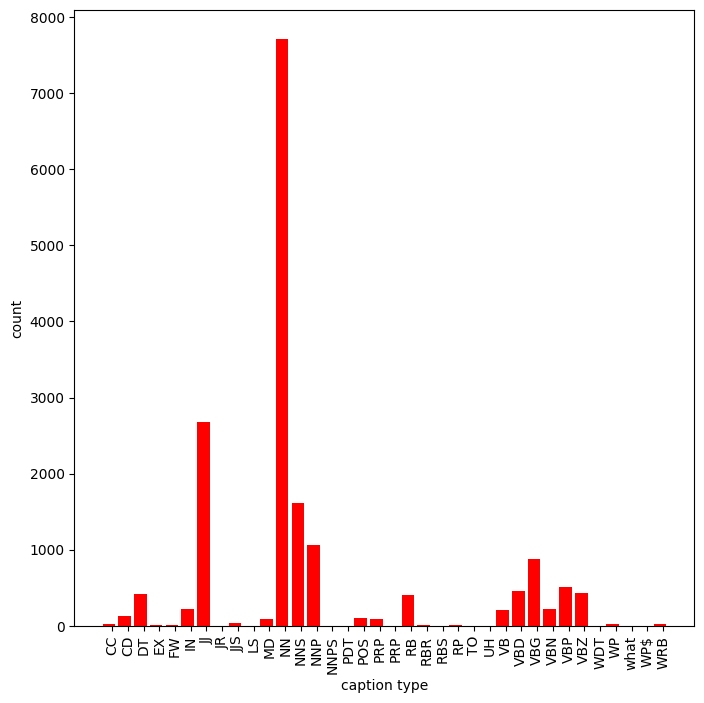

In [ ]:
plt.figure(figsize = (8, 8))
plt.bar(np.arange(36), taggedCountOrg, color = 'red')

plt.xlabel('caption type')
plt.xticks(np.arange(36) + 0.4/2, names, rotation = 90)
plt.ylabel('count')
plt.show()

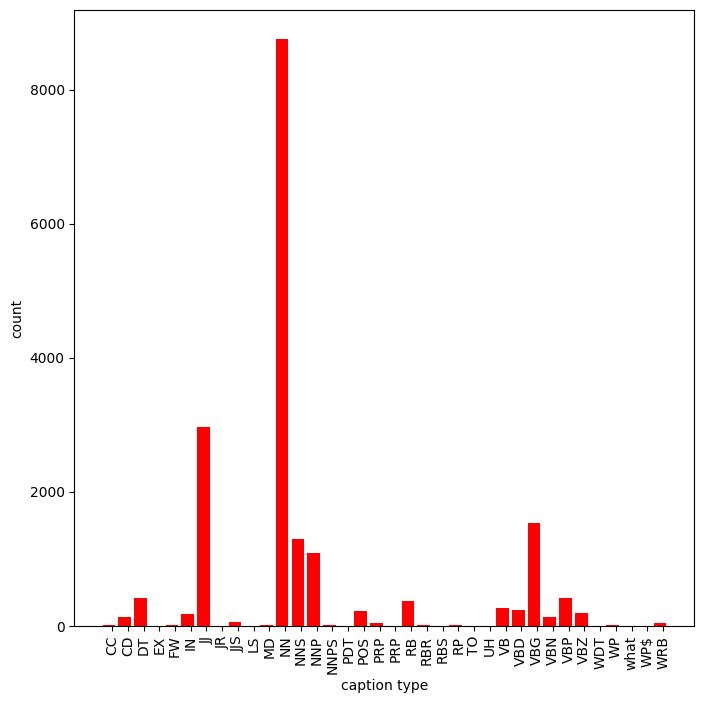

In [ ]:
plt.figure(figsize = (8, 8))
plt.bar(np.arange(36), taggedCountCreative, color = 'red')

plt.xlabel('caption type')
plt.xticks(np.arange(36) + 0.4/2, names, rotation = 90)
plt.ylabel('count')
plt.show()

###Sentence to sentence

In [ ]:
wordsList = nltk.word_tokenize(orgCaptions[2])
 
# removing stop words from wordList
wordsList = [w for w in wordsList if not w in stop_words]

#  Using a Tagger. Which is part-of-speech
# tagger or POS-tagger.
taggedOrg = nltk.pos_tag(wordsList)

taggedCountOrg = [0]*36

for i in taggedOrg:
  curTag = i[1]
  if(curTag in names):
    curIndex = names.index(curTag)
    taggedCountOrg[curIndex] = taggedCountOrg[curIndex] + 1
  else:
    continue
print(taggedCountOrg)

[0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]


In [ ]:
wordsList = nltk.word_tokenize(creativeCaptions[2])
 
# removing stop words from wordList
wordsList = [w for w in wordsList if not w in stop_words]

#  Using a Tagger. Which is part-of-speech
# tagger or POS-tagger.
taggedCreative = nltk.pos_tag(wordsList)

taggedCountCreative = [0]*36

for i in taggedCreative:
  curTag = i[1]
  if(curTag in names):
    curIndex = names.index(curTag)
    taggedCountCreative[curIndex] = taggedCountCreative[curIndex] + 1
  else:
    continue

print(taggedCountCreative)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


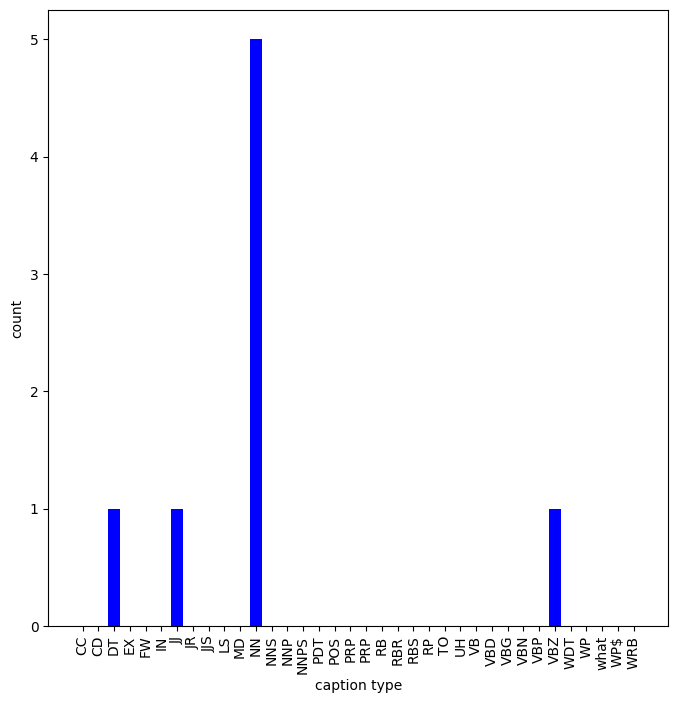

In [ ]:
plt.figure(figsize = (8, 8))
plt.bar(np.arange(36), taggedCountOrg, color = 'blue')

plt.xlabel('caption type')
plt.xticks(np.arange(36), names, rotation = 90)
plt.ylabel('count')
plt.show()

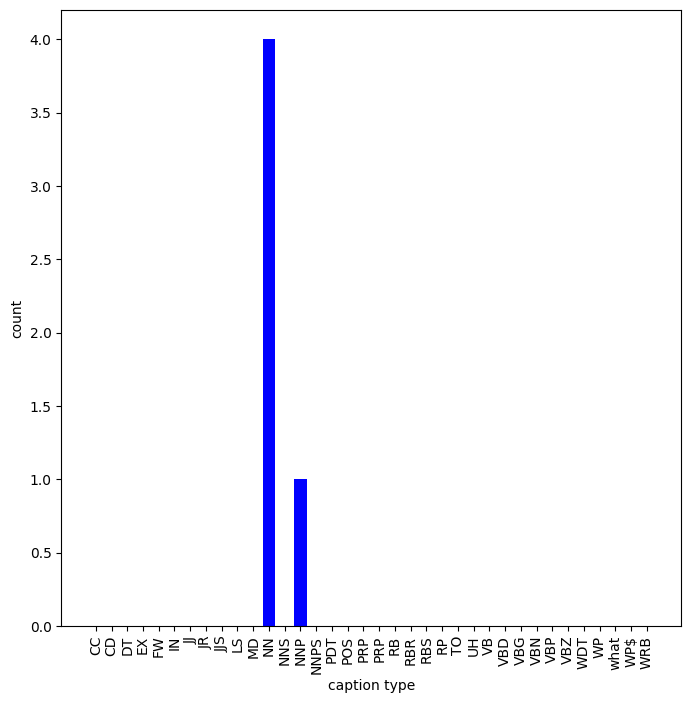

In [ ]:
plt.figure(figsize = (8, 8))
plt.bar(np.arange(36), taggedCountCreative, color = 'blue')

plt.xlabel('caption type')
plt.xticks(np.arange(36), names, rotation = 90)
plt.ylabel('count')
plt.show()